<a href="https://colab.research.google.com/github/nancymatijas/OSiRV-Projekt/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip3 install med2image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 30.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.6/291.6 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for med2image: filename=med2image-2.6.6-py3-none-any.whl size=18863 sha256=ab078cf4bc40e215528e4c40f7a7f60f5743a8e646e594245e052713fc030c09
  Stored in directory: /root/.cache/pip/wheels/07/cc/8e/2f95f14d9c19410733709350972e7e8d

# **PRETVORBA IZ .NII.GZ U .JPG**

# *Svaki .nii.gz slice u 154 slike*

In [ ]:
import os

# Path to the main directory
main_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData'

# Create the output directory for converted images
output_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData_output'

# Create the main output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all subdirectories in the main directory
subdirectories = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

# Loop through each subdirectory and convert files
for subdirectory in subdirectories:
    input_directory = os.path.join(main_directory, subdirectory)

    # Create the output directory within output_images
    output_case_directory = os.path.join(output_directory, subdirectory)
    os.makedirs(output_case_directory, exist_ok=True)

    # List all files in the subdirectory
    files = [f for f in os.listdir(input_directory) if f.endswith('.nii.gz')]

    # Loop through each file and convert
    for file in files:
        input_file = os.path.join(input_directory, file)
        output_file_stem = f"{subdirectory}_{os.path.splitext(file)[0]}"

        # Modify other parameters as needed
        command = f"med2image -i '{input_file}' -d '{output_case_directory}' -o '{output_file_stem}' --outputFileType jpg"

        try:
            # Execute the command
            os.system(command)
            print(f"Conversion successful for {input_file}")
        except Exception as e:
            print(f"Error converting {input_file}: {e}")

print("Conversion completed for all directories.")

# *Po jedna slika za svaki slice*

In [ ]:
import os

# Path to the main directory
main_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData'

# Create the output directory for converted images
output_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData_jpg'

# Create the main output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all subdirectories in the main directory
subdirectories = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

# Loop through each subdirectory and convert files
for subdirectory in subdirectories:
    input_directory = os.path.join(main_directory, subdirectory)

    # Create the output directory within output_images
    output_case_directory = os.path.join(output_directory, subdirectory)
    os.makedirs(output_case_directory, exist_ok=True)

    # List all files in the subdirectory
    files = [f for f in os.listdir(input_directory) if f.endswith('.nii.gz')]

    # Loop through each file and convert
    for file in files:
        input_file = os.path.join(input_directory, file)
        # Extract file name without extension
        file_name_without_extension = os.path.splitext(file)[0]

        # Remove the redundant part from the file name
        if file_name_without_extension.startswith(subdirectory):
            file_name_without_extension = file_name_without_extension[len(subdirectory) + 1:]

        # Combine subdirectory name and modified file name without extension
        output_file_stem = f"{subdirectory}_{file_name_without_extension}"

        # Modify other parameters as needed, adding --sliceToConvert
        command = f"med2image -i '{input_file}' -d '{output_case_directory}' -o '{output_file_stem}' --outputFileType jpg --sliceToConvert m"

        try:
            # Execute the command
            os.system(command)
            print(f"Conversion successful for {input_file}")
        except Exception as e:
            print(f"Error converting {input_file}: {e}")


print("Conversion completed for all directories.")

Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_026/BraTS20_Training_026_seg.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_026/BraTS20_Training_026_t1ce.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_026/BraTS20_Training_026_t2.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_026/BraTS20_Training_026_flair.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_026/BraTS20_Training_026_t1.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_021/BraTS20_Training_021_t1ce.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/BraTS20_Training_021/BraTS20_Training_021_seg.nii.gz
Conversion successful for /content/drive/MyDrive/MICCAI_BraTS2020_Training

# **SORTIRANJE**

In [ ]:
import shutil

# Path to the main directory
main_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData_output'

# Create the output directory for images
output_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData_sorted'
os.makedirs(output_directory, exist_ok=True)

# List all subdirectories in the main directory
subdirectories = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

# Loop through each subdirectory
for subdirectory in subdirectories:
    input_subdirectory = os.path.join(main_directory, subdirectory)

    # Create subdirectories 't1', 't2', 't1ce', 'flair', 'seg' within output2 for each subdirectory
    for image_type in ['t1', 't2', 't1ce', 'flair', 'seg']:
        type_directory = os.path.join(output_directory, image_type)
        os.makedirs(type_directory, exist_ok=True)

    # List all files in the subdirectory
    files = [f for f in os.listdir(input_subdirectory) if f.endswith('.jpg')]

    # Loop through each file and copy to the corresponding type directory
    for file in files:
        input_file = os.path.join(input_subdirectory, file)

        # Extract type from the file name
        image_type = file.split('_')[-1].split('-')[0]

        # Destination directory
        output_type_directory = os.path.join(output_directory, image_type)
        output_file = os.path.join(output_type_directory, file)
        shutil.copy(input_file, output_file)
        print(f"Copying {file} to {output_type_directory}")

print("Copying completed for all JPG images.")

# **PRIPREMA SLIKA**

In [ ]:
import os
import sys
import time
import cv2
import numpy as np
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt
from skimage.transform import resize

from IPython.display import clear_output

from PIL import Image

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms.functional as TF
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
imgs_dir='/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData_output'
all_dirs = glob (f'{imgs_dir}/*')
len (all_dirs)
all_dirs.sort()

In [ ]:
def shuffle_split (all_dirs, val_pct = 0.15, seed = 99):
    n_val = int (len (all_dirs) * val_pct)
    np.random.seed (seed)
    idx = np.random.permutation (len (all_dirs))
    all_dirs = np.array (all_dirs) [idx]

    return all_dirs [n_val:], all_dirs [:n_val]

train_dirs, valid_dirs = shuffle_split (all_dirs, seed = 1)
len(valid_dirs), len(train_dirs)

(25, 145)

In [ ]:
class BratsDataset (Dataset):
    def __init__ (self, img_dirs, modality_types, transform = None):
        self.img_dirs = img_dirs
        self.transform = transform

    def __len__ (self):
        return len (self.img_dirs)

    def __getitem__ (self, index):
        imgs_path = self.img_dirs [index]
        image = self.concat_imgs (imgs_path)
        mask = np.array (Image.open (f'{imgs_path}/seg.jpg'))
        mask = (mask / 255 * 4).round ()
        mask = self.preprocess_mask_labels(mask)


        if self.transform is not None:
            augmented = self.transform(image = image, mask = mask)
            image = augmented ['image']
            mask = augmented ['mask']

        return image.astype(np.float), mask.astype(np.float)

    def concat_imgs (self, path: str):
        types = []
        for modality_type in modality_types:
            img = np.array (Image.open (f'{path}/{modality_type}.jpg'))
            img = self.normalize(img)
            types.append (img)
#         cat_img = np.concatenate (types, axis = -1)

        return np.array(types)

    def preprocess_mask_labels(self, mask: np.ndarray):
        mask_WT = np.zeros(mask.shape)
        mask_WT[mask == 2] = 1

        mask_TC = np.zeros(mask.shape)
        mask_TC[mask == 1] = 1

        mask_ET = np.zeros(mask.shape)
        mask_ET[mask == 3] = 1

        mask_BG = np.zeros(mask.shape)
        mask_BG[mask == 0] = 1

        mask = np.stack([mask_WT, mask_TC, mask_ET, mask_BG])
        # mask = np.moveaxis(mask, (0, 1, 2), (0, 2, 1))
        return mask

    def normalize(self, data: np.ndarray):
        data_min = np.min(data)
        if np.max(data) == 0:
            return data
        if (np.max(data) - data_min) == 0:
            return data / data_min

        return (data - data_min) / (np.max(data) - data_min)

    trn_tfms = A.Compose (
[
    A.Resize (height = 240, width = 240),
    #     A.Rotate (limit = 35, p = 1.0),
    #     A.HorizontalFlip (p = 0.5),
    #     A.VerticalFlip (p = 0.1),
        # A.Normalize (mean=0.5, std=0.5, max_pixel_value = 255.0),
            # img = (img - mean * max_pixel_value) / (std * max_pixel_value)
    #     ToTensorV2 ()
            # The numpy HWC image is converted to pytorch CHW tensor. If the image is in HW format (grayscale image), it will be converted to pytorch HW tensor.
])

val_tfms = A.Compose (
[
    A.Resize (height = 240, width = 240),
    #     A.Normalize (0.5, 0.5, max_pixel_value = 255.0),
    #     ToTensorV2 ()
])

modality_types = ['flair', 't1', 't1ce', 't2']

In [ ]:
train_ds = BratsDataset(train_dirs, modality_types)
valid_ds = BratsDataset(valid_dirs, modality_types)
train_dl = DataLoader(train_ds, batch_size = 8, shuffle = False, num_workers = 2, pin_memory = True)
valid_dl = DataLoader(valid_ds, batch_size = 8, shuffle = False, num_workers = 2, pin_memory = True)

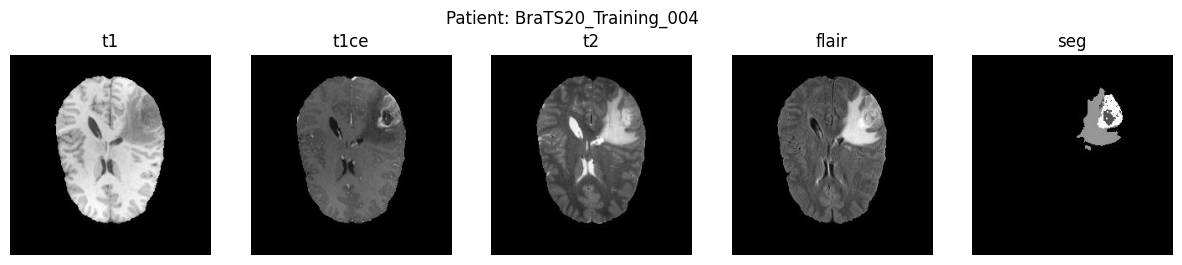

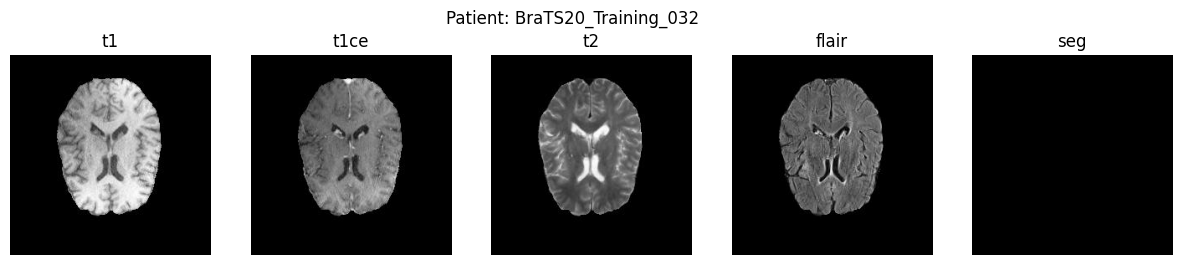

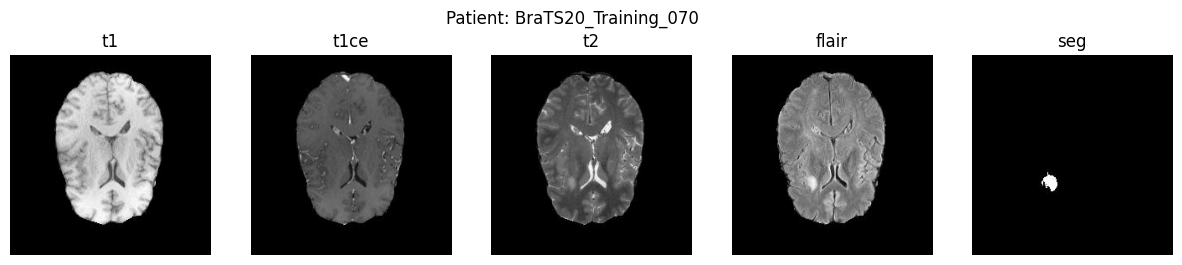

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Zamijenite ovo sa stvarnom putanjom do vašeg glavnog izlaznog direktorija
main_output_directory = '/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData_output/'

# Lista svih direktorija pacijenata u glavnom izlaznom direktoriju
patient_directories = [d for d in os.listdir(main_output_directory) if os.path.isdir(os.path.join(main_output_directory, d))]

# Nasumično odaberite 3 pacijenta
selected_patients = np.random.choice(patient_directories, size=3, replace=False)

# Funkcija za izdvajanje modality type iz naziva slike
def extract_modality_type(file_name):
    return file_name.split('_')[-1].split('-')[0]

# Prikazi slike za svakog odabrana pacijenta
for selected_patient in selected_patients:
    # Konstruiraj putanju do izlaznog direktorija odabranog pacijenta
    selected_patient_output_directory = os.path.join(main_output_directory, selected_patient)

    # Lista svih datoteka slika u izlaznom direktoriju odabranog pacijenta
    image_files = [f for f in os.listdir(selected_patient_output_directory) if f.endswith('.jpg')]

    # Sortiraj slike prema redoslijedu T1, T1CE, T2, FLAIR, seg
    image_files.sort(key=lambda x: ['t1', 't1ce', 't2', 'flair', 'seg'].index(extract_modality_type(x.lower())))

    # Prikazi svaku odabrane slike s povećanim razmakom
    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        # Izdvoji modality type pomoću funkcije
        modality_type = extract_modality_type(image_file)

        # Učitaj sliku
        img_path = os.path.join(selected_patient_output_directory, image_file)
        img = np.array(Image.open(img_path))

        plt.subplot(1, len(image_files), i + 1)
        plt.imshow(img, cmap='bone')
        plt.axis('off')
        plt.title(modality_type)

    plt.suptitle(f"Patient: {selected_patient}", fontsize=12)
    plt.show()
